In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib
from sklearn.utils import shuffle
from matplotlib.ticker import FormatStrFormatter
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
noise = 0
X = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}x.npy'.format(noise))
y = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}y.npy'.format(noise), allow_pickle=True)
#X  = (X - np.min(X)) / (np.max(X) - np.min(X))
normalized_X = np.concatenate((X[0:750], X[1000:1250]), axis=0)
normalized_y = np.concatenate((y[0:750], y[1000:1250]), axis=0)
print(normalized_X.shape)
print(normalized_y.shape)
normalized_y[0:500, 0] = 0       # undisturbed
normalized_y[500:1000, 0] = 1    # distrubed
X_reshape = normalized_X.reshape(1000, 16, 8)
X_reshape = np.expand_dims(X_reshape, axis=-1)

X_train = np.concatenate((X_reshape[0:300], X_reshape[500:800]), axis=0)
X_test = np.concatenate((X_reshape[300:500], X_reshape[800:1000]), axis=0)
y_train = np.concatenate((normalized_y[0:300], normalized_y[500:800]), axis=0)
y_test = np.concatenate((normalized_y[300:500], normalized_y[800:1000]), axis=0)
y_test_short = y_test[:, 0].astype(int)
y_train_short = y_train[:, 0].astype(int)

(1000, 128)
(1000, 5)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 8, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 4, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 2, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 512)               0

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor the validation loss
    patience=15,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the weights of the best model at the end of training
    mode='max'  # The mode can be 'auto', 'min', or 'max'. For loss, 'min' is preferred
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_short, epochs=50, validation_data=(X_test, y_test_short), callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 2s 26ms/step - loss: 0.6576 - accuracy: 0.9267 - val_loss: 0.3354 - val_accuracy: 1.0000
Epoch 2/50
19/19 [==============================] - 0s 15ms/step - loss: 0.3147 - accuracy: 1.0000 - val_loss: 0.2804 - val_accuracy: 1.0000
Epoch 3/50
19/19 [==============================] - 0s 16ms/step - loss: 0.2101 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 1.0000
Epoch 4/50
19/19 [==============================] - 0s 16ms/step - loss: 0.0413 - accuracy: 0.9983 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/50
19/19 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 5.5786e-04 - val_accuracy: 1.0000
Epoch 6/50
19/19 [==============================] - 0s 15ms/step - loss: 3.5475e-04 - accuracy: 1.0000 - val_loss: 2.7994e-04 - val_accuracy: 1.0000
Epoch 7/50
19/19 [==============================] - 0s 15ms/step - loss: 2.0515e-04 - accuracy: 1.0000 - val_loss: 2.0613e-04 - val_accuracy: 

13/13 - 0s - loss: 2.6204 - accuracy: 0.4950 - 67ms/epoch - 5ms/step


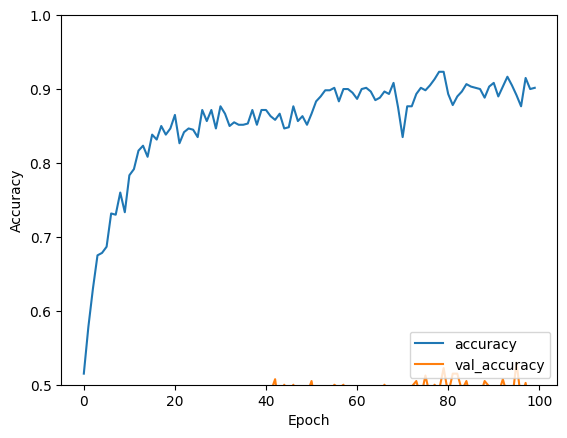

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test_short, verbose=2)

(1000, 128)
(1000, 5)
X_train (600, 128)
y_train (600,)


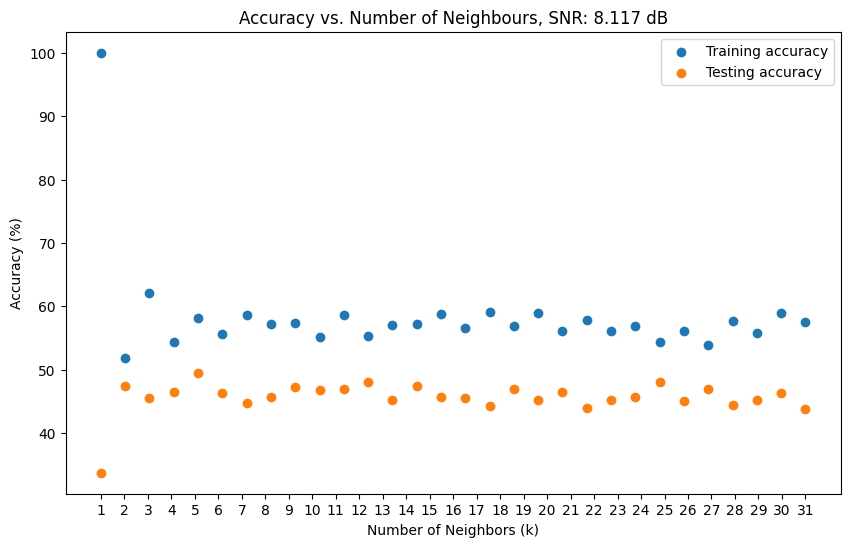

In [ ]:
#knn - how many neighbours?
noise = 1024
X = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}x.npy'.format(noise))
y = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}y.npy'.format(noise), allow_pickle=True)
normalized_X = np.concatenate((X[0:750], X[1000:1250]), axis=0)
normalized_y = np.concatenate((y[0:750], y[1000:1250]), axis=0)
print(normalized_X.shape)
print(normalized_y.shape)
normalized_y[0:500, 0] = 0       # undisturbed
normalized_y[500:1000, 0] = 1    # distrubed

# run 1 ########################################################################
#normalized_X  = (X - np.min(X)) / (np.max(X) - np.min(X))
X_train = np.concatenate((normalized_X[0:300], normalized_X[500:800]), axis=0)
X_test = np.concatenate((normalized_X[300:500], normalized_X[800:1000]), axis=0)
y_train = np.concatenate((normalized_y[0:300], normalized_y[500:800]), axis=0)
y_test = np.concatenate((normalized_y[300:500], normalized_y[800:1000]), axis=0)
y_test_short = y_test[:, 0].astype(int)
y_train_short = y_train[:, 0].astype(int)

X_train, y_train_short = shuffle(X_train, y_train_short)
print('X_train', X_train.shape)
print('y_train', y_train_short.shape)


# Arrays to store accuracy for different values of k
train_scores = []
test_scores = []

# Iterate over different values of k
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_short)
    train_scores.append(knn.score(X_train, y_train_short) *100)
    test_scores.append(knn.score(X_test, y_test_short) * 100)

x = np.linspace(1, 31, 30)
# Plot accuracy vs. number of neighbors
plt.figure(figsize=(10, 6))
plt.scatter(x, train_scores, label='Training accuracy')
plt.scatter(x, test_scores, label='Testing accuracy')
plt.xticks(np.arange(1, 32))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Neighbours, SNR: 8.117 dB')
plt.legend()
plt.show()


(1000, 128)
(1000, 5)
X_train (600, 128)
y_train (600,)


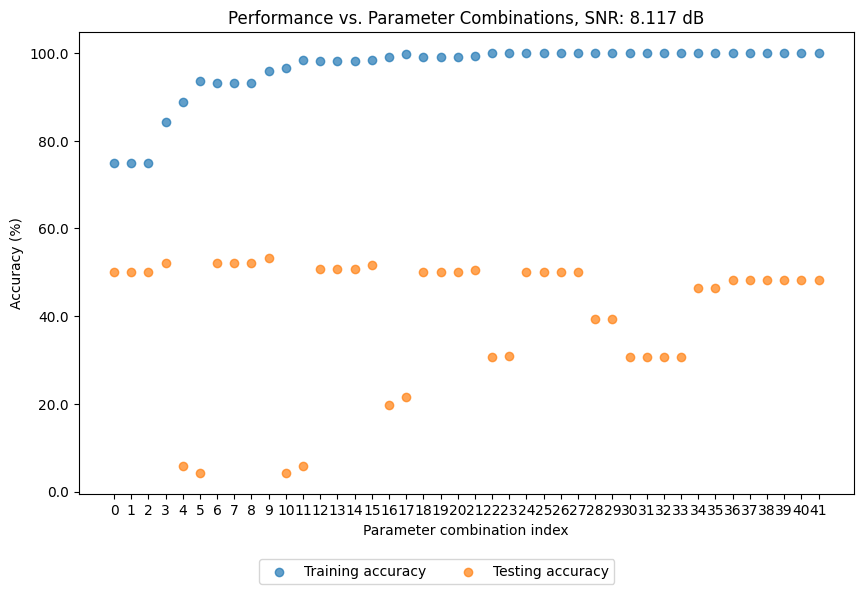

In [ ]:
# svm

noise = 1024
X = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}x.npy'.format(noise))
y = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}y.npy'.format(noise), allow_pickle=True)
normalized_X = np.concatenate((X[0:750], X[1000:1250]), axis=0)
normalized_y = np.concatenate((y[0:750], y[1000:1250]), axis=0)
print(normalized_X.shape)
print(normalized_y.shape)
normalized_y[0:500, 0] = 0       # undisturbed
normalized_y[500:1000, 0] = 1    # distrubed

# run 1 ########################################################################
#normalized_X  = (X - np.min(X) / (np.max(X) - np.min(X))
X_train = np.concatenate((normalized_X[0:300], normalized_X[500:800]), axis=0)
X_test = np.concatenate((normalized_X[300:500], normalized_X[800:1000]), axis=0)
y_train = np.concatenate((normalized_y[0:300], normalized_y[500:800]), axis=0)
y_test = np.concatenate((normalized_y[300:500], normalized_y[800:1000]), axis=0)
y_test_short = y_test[:, 0].astype(int)
y_train_short = y_train[:, 0].astype(int)

X_train, y_train_short = shuffle(X_train, y_train_short)
print('X_train', X_train.shape)
print('y_train', y_train_short.shape)

gamma = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 1]
C = [0.001, 0.01, 0.1, 1, 10, 100]

train_scores = []
test_scores = []
for g in gamma:
  for c in C:
    svm_classifier = SVC(kernel='rbf', gamma=g, C=c)
    svm_classifier.fit(X_train, y_train_short)
    train_scores.append(float(svm_classifier.score(X_train, y_train_short) *100))
    test_scores.append(float(svm_classifier.score(X_test, y_test_short) * 100))


param_combinations = range(len(gamma) * len(C))


plt.figure(figsize=(10, 6))
plt.scatter(param_combinations, train_scores, label='Training accuracy', alpha=0.7)
plt.scatter(param_combinations, test_scores, label='Testing accuracy', alpha=0.7)
plt.xlabel('Parameter combination index')
plt.ylabel('Accuracy (%)')
plt.xticks(param_combinations)
plt.title('Performance vs. Parameter Combinations, SNR: 8.117 dB')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.legend(bbox_to_anchor=(0.7, -0.21), loc='lower right', ncol=2)
plt.show()

(1000, 128)
(1000, 5)
X_train (600, 128)
y_train (600,)


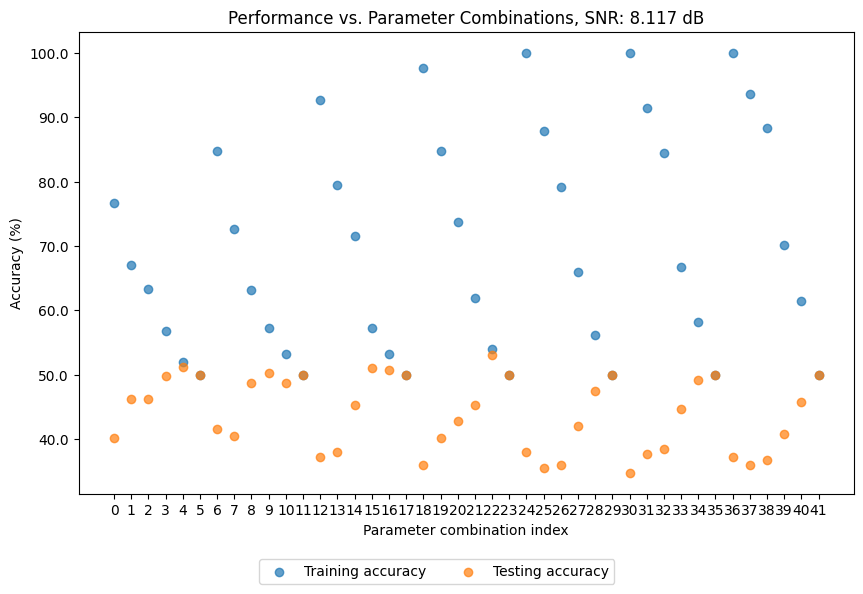

In [ ]:
# random forest

noise = 1024
X = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}x.npy'.format(noise))
y = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}y.npy'.format(noise), allow_pickle=True)
normalized_X = np.concatenate((X[0:750], X[1000:1250]), axis=0)
normalized_y = np.concatenate((y[0:750], y[1000:1250]), axis=0)
print(normalized_X.shape)
print(normalized_y.shape)
normalized_y[0:500, 0] = 0       # undisturbed
normalized_y[500:1000, 0] = 1    # distrubed

# run 1 ########################################################################
#normalized_X  = (X - np.min(X)) / (np.max(X) - np.min(X))
X_train = np.concatenate((normalized_X[0:300], normalized_X[500:800]), axis=0)
X_test = np.concatenate((normalized_X[300:500], normalized_X[800:1000]), axis=0)
y_train = np.concatenate((normalized_y[0:300], normalized_y[500:800]), axis=0)
y_test = np.concatenate((normalized_y[300:500], normalized_y[800:1000]), axis=0)
y_test_short = y_test[:, 0].astype(int)
y_train_short = y_train[:, 0].astype(int)

X_train, y_train_short = shuffle(X_train, y_train_short)
print('X_train', X_train.shape)
print('y_train', y_train_short.shape)

n_estimators = [2, 4, 8, 16, 32, 64, 128]
min_samples_leaf = [1, 5, 10, 50, 150, 200]

train_scores = []
test_scores = []
for n in n_estimators:
  for m in min_samples_leaf:
    rf_classifier = RandomForestClassifier(n_estimators=n, min_samples_leaf=m)
    rf_classifier.fit(X_train, y_train_short)
    train_scores.append(float(rf_classifier.score(X_train, y_train_short) *100))
    test_scores.append(float(rf_classifier.score(X_test, y_test_short) * 100))


param_combinations = range(len(n_estimators) * len(min_samples_leaf))


plt.figure(figsize=(10, 6))
plt.scatter(param_combinations, train_scores, label='Training accuracy', alpha=0.7)
plt.scatter(param_combinations, test_scores, label='Testing accuracy', alpha=0.7)
plt.xlabel('Parameter combination index')
plt.ylabel('Accuracy (%)')
plt.xticks(param_combinations)
plt.title('Performance vs. Parameter Combinations, SNR: 8.117 dB')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.legend(bbox_to_anchor=(0.7, -0.21), loc='lower right', ncol=2)
plt.show()

In [ ]:
# grid search

from sklearn.model_selection import GridSearchCV

noise = 1024
X = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}x.npy'.format(noise))
y = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}y.npy'.format(noise), allow_pickle=True)
normalized_X = np.concatenate((X[0:750], X[1000:1250]), axis=0)
normalized_y = np.concatenate((y[0:750], y[1000:1250]), axis=0)
#print(normalized_X.shape)
#print(normalized_y.shape)
normalized_y[0:500, 0] = 0       # undisturbed
normalized_y[500:1000, 0] = 1    # distrubed

# run 1 ########################################################################
#normalized_X  = (X - np.min(X)) / (np.max(X) - np.min(X))
X_train = np.concatenate((normalized_X[0:300], normalized_X[500:800]), axis=0)
X_test = np.concatenate((normalized_X[300:500], normalized_X[800:1000]), axis=0)
y_train = np.concatenate((normalized_y[0:300], normalized_y[500:800]), axis=0)
y_test = np.concatenate((normalized_y[300:500], normalized_y[800:1000]), axis=0)
y_test_short = y_test[:, 0].astype(int)
y_train_short = y_train[:, 0].astype(int)
X_train, y_train_short = shuffle(X_train, y_train_short)

grid_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_svm = {
  'gamma': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 1],
  'coef0': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_rf = {
  'n_estimators': [2, 4, 8, 16, 32, 64, 128],
  'min_samples_leaf': [1, 5, 10, 50, 150, 200]
}


def calculate_best_params(X_train, y_train, X_test, y_test, grid_knn, grid_svm, grid_rf):
    knn = KNeighborsClassifier()
    svm  = SVC()
    rf = RandomForestClassifier()


    knn_cv = GridSearchCV(knn, grid_knn)
    svm_cv = GridSearchCV(svm, grid_svm)
    rf_cv = GridSearchCV(rf, grid_rf)

    knn_cv.fit(X_train, y_train)
    svm_cv.fit(X_train, y_train)
    rf_cv.fit(X_train, y_train)

    knn_best_para = knn_cv.best_params_
    knn_train_score = knn_cv.best_score_
    knn_test_score = knn_cv.score(X_test, y_test)

    svm_best_para = svm_cv.best_params_
    svm_train_score = svm_cv.best_score_
    svm_test_score = svm_cv.score(X_test, y_test)

    rf_best_para = rf_cv.best_params_
    rf_train_score = rf_cv.best_score_
    rf_test_score = rf_cv.score(X_test, y_test)


    return knn_best_para, knn_train_score, knn_test_score, svm_best_para, svm_train_score, svm_test_score, rf_best_para, rf_train_score, rf_test_score



knn_best_para_1, knn_train_score_1, knn_test_score_1, svm_best_para_1, svm_train_score_1, svm_test_score_1, rf_best_para_1, rf_train_score, rf_test_score = calculate_best_params(X_train, y_train_short, X_test, y_test_short, grid_knn, grid_svm, grid_rf)

In [ ]:
# grid search - automate

def knn(X_train, y_train, X_test, y_test):
  train_scores = []
  test_scores = []

  k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  for k in k_values:
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
      train_scores.append(knn.score(X_train, y_train))
      test_scores.append(knn.score(X_test, y_test))


  return np.max(train_scores), np.max(test_scores)


def svm(X_train, y_train, X_test, y_test):

  gamma = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
  C = [0.001, 0.01, 0.1, 1, 10, 100]

  train_scores = []
  test_scores = []
  for g in gamma:
   for c in C:
    svm_classifier = SVC(kernel='rbf', gamma=g, C=c)
    svm_classifier.fit(X_train, y_train)
    train_scores.append(float(svm_classifier.score(X_train, y_train)))
    test_scores.append(float(svm_classifier.score(X_test, y_test)))

  return np.max(train_scores), np.max(test_scores)


def rf(X_train, y_train, X_test, y_test):

  n_estimators = [2, 4, 8, 16, 32, 64, 128]
  min_samples_leaf = [1, 5, 10, 50, 150, 200]

  train_scores = []
  test_scores = []
  for n in n_estimators:
    for m in min_samples_leaf:
      rf_classifier = RandomForestClassifier(n_estimators=n, min_samples_leaf=m)
      rf_classifier.fit(X_train, y_train)
      train_scores.append(float(rf_classifier.score(X_train, y_train)))
      test_scores.append(float(rf_classifier.score(X_test, y_test)))

  return np.max(train_scores), np.max(test_scores)


def nn(X_train, y_train, X_test, y_test):

  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 8, 1), padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    mode='max')

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = model.fit(X_train, y_train_short, epochs=50, validation_data=(X_test, y_test_short), callbacks=[early_stopping])

  nn_train_score = np.max(history.history['accuracy'])
  nn_test_score = np.max(history.history['val_accuracy'])

  return nn_train_score, nn_test_score


nn_test_accuracy = []
knn_test_accuracy = []
svm_test_accuracy = []
rf_test_accuracy = []

for i in index:

  X = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}x.npy'.format(i))
  y = np.load('/content/drive/MyDrive/My Folder/1.2/1.2_noise_{}y.npy'.format(i), allow_pickle=True)
  normalized_X = np.concatenate((X[0:750], X[1000:1250]), axis=0)
  normalized_y = np.concatenate((y[0:750], y[1000:1250]), axis=0)
  normalized_y[0:500, 0] = 0       # undisturbed
  normalized_y[500:1000, 0] = 1    # distrubed
  #normalized_X  = (X_binary - np.min(X_binary)) / (np.max(X_binary) - np.min(X_binary))

  #run 1
  X_train, X_test = np.concatenate((normalized_X[0:300], normalized_X[500:800]), axis=0), np.concatenate((normalized_X[300:500], normalized_X[800:1000]), axis=0)
  y_train, y_test = np.concatenate((normalized_y[0:300], normalized_y[500:800]), axis=0), np.concatenate((normalized_y[300:500], normalized_y[800:1000]), axis=0)

  y_test_short, y_train_short = y_test[:, 0].astype(int), y_train[:, 0].astype(int)
  X_train, y_train_short = shuffle(X_train, y_train_short)
  X_train_nn, X_test_nn = X_train.reshape(600, 16, 8), X_test.reshape(400, 16, 8)
  X_train_nn, X_test_nn  = np.expand_dims(X_train_nn, axis=-1), np.expand_dims(X_test_nn, axis=-1)

  knn_train_1, knn_test_1 = knn(X_train, y_train_short, X_test, y_test_short)
  svm_train_1, svm_test_1 = svm(X_train, y_train_short, X_test, y_test_short)
  rf_train_1, rf_test_1 = rf(X_train, y_train_short, X_test, y_test_short)
  nn_train_1, nn_test_1 = nn(X_train_nn, y_train_short, X_test_nn, y_test_short)
  nn_train_1, nn_test_1 = nn(X_train_nn, y_train_short, X_test_nn, y_test_short)


  #run 2
  X_train, X_test = np.concatenate((normalized_X[0:150], normalized_X[350:500], normalized_X[500:650], normalized_X[850:1000]), axis=0), np.concatenate((normalized_X[150:350], normalized_X[650:850]), axis=0)
  y_train, y_test = np.concatenate((normalized_y[0:150], normalized_y[350:500], normalized_y[500:650], normalized_y[850:1000]), axis=0), np.concatenate((normalized_y[150:350], normalized_y[650:850]), axis=0)

  y_test_short, y_train_short = y_test[:, 0].astype(int), y_train[:, 0].astype(int)
  X_train, y_train_short = shuffle(X_train, y_train_short)
  X_train_nn, X_test_nn = X_train.reshape(600, 16, 8), X_test.reshape(400, 16, 8)
  X_train_nn, X_test_nn  = np.expand_dims(X_train_nn, axis=-1), np.expand_dims(X_test_nn, axis=-1)

  knn_train_2, knn_test_2 = knn(X_train, y_train_short, X_test, y_test_short)
  svm_train_2, svm_test_2 = svm(X_train, y_train_short, X_test, y_test_short)
  rf_train_2, rf_test_2 = rf(X_train, y_train_short, X_test, y_test_short)
  nn_train_2, nn_test_2 = nn(X_train_nn, y_train_short, X_test_nn, y_test_short)


  #run 3
  X_train, X_test = np.concatenate((normalized_X[200:500], normalized_X[700:1000]), axis=0), np.concatenate((normalized_X[0:200], normalized_X[500:700]), axis=0)
  y_train, y_test = np.concatenate((normalized_y[200:500], normalized_y[700:1000]), axis=0), np.concatenate((normalized_y[0:200], normalized_y[500:700]), axis=0)

  y_test_short, y_train_short = y_test[:, 0].astype(int), y_train[:, 0].astype(int)
  X_train, y_train_short = shuffle(X_train, y_train_short)
  X_train_nn, X_test_nn = X_train.reshape(600, 16, 8), X_test.reshape(400, 16, 8)
  X_train_nn, X_test_nn  = np.expand_dims(X_train_nn, axis=-1), np.expand_dims(X_test_nn, axis=-1)

  knn_train_3, knn_test_3 = knn(X_train, y_train_short, X_test, y_test_short)
  svm_train_3, svm_test_3 = svm(X_train, y_train_short, X_test, y_test_short)
  rf_train_3, rf_test_3 = rf(X_train, y_train_short, X_test, y_test_short)
  nn_train_3, nn_test_3 = nn(X_train_nn, y_train_short, X_test_nn, y_test_short)

  knn_mean, knn_sd  = statistics.mean([knn_test_1, knn_test_2, knn_test_3]), statistics.stdev([knn_test_1, knn_test_2, knn_test_3])
  svm_mean, svm_sd = statistics.mean([svm_test_1, svm_test_2, svm_test_3]), statistics.stdev([svm_test_1, svm_test_2, svm_test_3])
  rf_mean, rf_sd = statistics.mean([rf_test_1, rf_test_2, rf_test_3]), statistics.stdev([rf_test_1, rf_test_2, rf_test_3])
  nn_mean, nn_sd = statistics.mean([nn_test_1, nn_test_2, nn_test_3]), statistics.stdev([nn_test_1, nn_test_2, nn_test_3])

  knn_test_accuracy.append(knn_mean*100)
  svm_test_accuracy.append(svm_mean*100)
  rf_test_accuracy.append(rf_mean*100)
  nn_test_accuracy.append(nn_mean*100)


  print('------------------------------------------------------------------------------------------------------')
  print('noise scale: {}'.format(i))
  print()
  print('kNN')
  print('train score 1: ', knn_train_1, ', train score 2: ', knn_train_2, ', train_score 3: ', knn_train_3)
  print('test score 1: ', knn_test_1, ', test score 2: ', knn_test_2, ', test_score 3: ', knn_test_3)
  print()
  print('SVM')
  print('train score 1: ', svm_train_1, ', train score 2: ', svm_train_2, ', train_score 3: ', svm_train_3)
  print('test score 1: ', svm_test_1, ', test score 2: ', svm_test_2, ', test_score 3: ', svm_test_3)
  print()
  print('rf')
  print('train score 1: ', rf_train_1, ', train score 2: ', rf_train_2, ', train_score 3: ', rf_train_3)
  print('test score 1: ', rf_test_1, ', test score 2: ', rf_test_2, ', test_score 3: ', rf_test_3)
  print()
  print('nn')
  print('train score 1: ', nn_train_1, ', train score 2: ', nn_train_2, ', train_score 3: ', nn_train_3)
  print('test score 1: ', nn_test_1, ', test score 2: ', nn_test_2, ', test_score 3: ', nn_test_3)
  print()
  print('kNN Mean: ', round(knn_mean, 3),', kNN sd: ', round(knn_sd, 3))
  print('SVM Mean: ', round(svm_mean, 3),', SVM sd: ', round(svm_sd, 3))
  print('RF Mean : ', round(rf_mean, 3),', RF sd : ', round(rf_sd, 3))
  print('NN Mean : ', round(nn_mean, 3),', NN sd : ', round(nn_sd, 3))


Epoch 1/50
19/19 [==============================] - 2s 45ms/step - loss: 0.3484 - accuracy: 0.9533 - val_loss: 0.3381 - val_accuracy: 1.0000
Epoch 2/50
19/19 [==============================] - 0s 24ms/step - loss: 0.3271 - accuracy: 1.0000 - val_loss: 0.3057 - val_accuracy: 1.0000
Epoch 3/50
19/19 [==============================] - 0s 17ms/step - loss: 0.2381 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 1.0000
Epoch 4/50
19/19 [==============================] - 0s 18ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 6.7969e-04 - val_accuracy: 1.0000
Epoch 5/50
19/19 [==============================] - 0s 19ms/step - loss: 1.9453e-04 - accuracy: 1.0000 - val_loss: 5.3750e-05 - val_accuracy: 1.0000
Epoch 6/50
19/19 [==============================] - 0s 19ms/step - loss: 3.9916e-05 - accuracy: 1.0000 - val_loss: 3.1718e-05 - val_accuracy: 1.0000
Epoch 7/50
19/19 [==============================] - 0s 23ms/step - loss: 2.9337e-05 - accuracy: 1.0000 - val_loss: 2.7228e-05 - val_ac

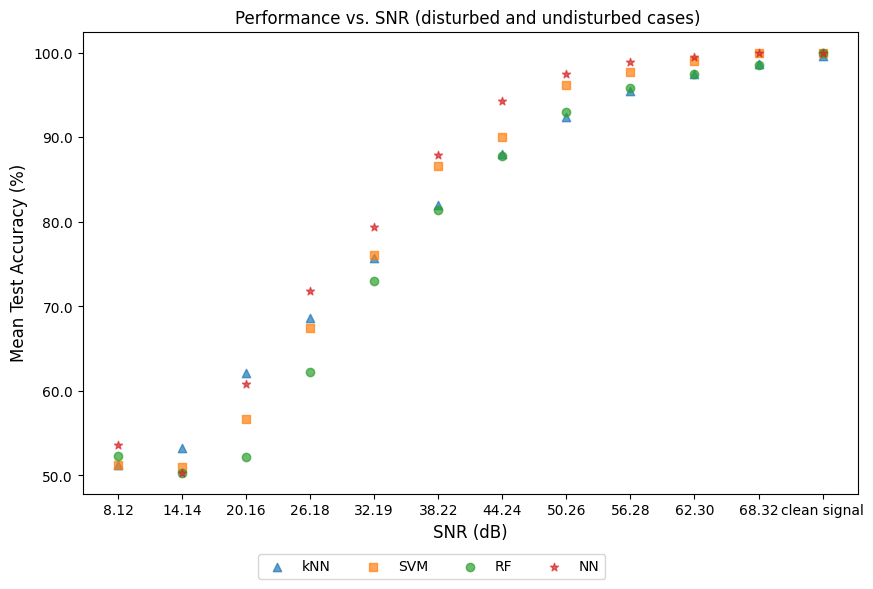

In [ ]:
x_axis = ['clean signal', '68.32', '62.30', '56.28', '50.26', '44.24', '38.22', '32.19', '26.18', '20.16', '14.14', '8.12']
plt.figure(figsize=(10, 6))
plt.scatter(x_axis[::-1], knn_test_accuracy[::-1], marker='^', label='kNN', alpha=0.7)
plt.scatter(x_axis[::-1], svm_test_accuracy[::-1], marker='s', label='SVM', alpha=0.7)
plt.scatter(x_axis[::-1], rf_test_accuracy[::-1], marker='o', label='RF', alpha=0.7)
plt.scatter(x_axis[::-1], nn_test_accuracy[::-1], marker='*', label='NN', alpha=0.7)

plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Mean Test Accuracy (%)', fontsize=12)
plt.xscale('linear')
plt.xticks(x_axis, labels=x_axis)
plt.title('Performance vs. SNR (disturbed and undisturbed cases) ')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.legend(bbox_to_anchor=(0.45, -0.20), loc='lower center', ncol=4)
plt.show()

